In [41]:
import pandas as pd

In [42]:
path = 'dane.xlsx'
df = pd.read_excel(path, sheet_name=1)

Wstępne zapoznanie się z danymi

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50839 entries, 0 to 50838
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Purchase Month             50839 non-null  datetime64[ns]
 1   Purchase Year              50839 non-null  datetime64[ns]
 2   Travel Month               50839 non-null  datetime64[ns]
 3   Travel Year                50839 non-null  datetime64[ns]
 4   Days Sold Prior to Travel  50839 non-null  int64         
 5   Ticketing Al               50839 non-null  object        
 6   Orig                       50839 non-null  object        
 7   Dest                       50839 non-null  object        
 8   Nights Stayed              43615 non-null  float64       
 9   Trip O&D Market            50839 non-null  object        
 10  Pax                        50839 non-null  int64         
 11  FARE+YQ                    50839 non-null  float64       
dtypes: d

In [44]:
df.shape

(50839, 12)

In [45]:
df.columns

Index(['Purchase Month', 'Purchase Year', 'Travel Month', 'Travel Year',
       'Days Sold Prior to Travel', 'Ticketing Al', 'Orig', 'Dest',
       'Nights Stayed', 'Trip O&D Market', 'Pax', 'FARE+YQ'],
      dtype='object')

In [46]:
df.head()

,Purchase Month,Purchase Year,Travel Month,Travel Year,Days Sold Prior to Travel,Ticketing Al,Orig,Dest,Nights Stayed,Trip O&D Market,Pax,FARE+YQ
0,2021-02-01,2021-01-01,2022-01-01,2022-01-01,343,LO,WAW,AMS,7.0,WAW-AMS,1,59.4665
1,2021-02-01,2021-01-01,2022-02-01,2022-01-01,339,LO,WAW,AMS,8.0,WAW-AMS,1,71.3000
2,2021-03-01,2021-01-01,2022-01-01,2022-01-01,301,KL,WAW,AMS,10.0,WAW-AMS,1,145.0380
3,2021-03-01,2021-01-01,2022-01-01,2022-01-01,309,KL,WAW,AMS,0.0,WAW-AMS,5,602.5080
4,2021-05-01,2021-01-01,2022-01-01,2022-01-01,241,LO,WAW,AMS,112.0,WAW-AMS,4,185.5295


In [47]:
df.isnull().sum()

Purchase Month                  0
Purchase Year                   0
Travel Month                    0
Travel Year                     0
Days Sold Prior to Travel       0
Ticketing Al                    0
Orig                            0
Dest                            0
Nights Stayed                7224
Trip O&D Market                 0
Pax                             0
FARE+YQ                         0
dtype: int64

In [48]:
numeric_data = df[['Days Sold Prior to Travel','Nights Stayed','Pax','FARE+YQ']]
numeric_data.head()

,Days Sold Prior to Travel,Nights Stayed,Pax,FARE+YQ
0,343,7.0,1,59.4665
1,339,8.0,1,71.3000
2,301,10.0,1,145.0380
3,309,0.0,5,602.5080
4,241,112.0,4,185.5295


In [49]:
numeric_data.describe()

,Days Sold Prior to Travel,Nights Stayed,Pax,FARE+YQ
count,50839.000000,43615.000000,50839.000000,50839.000000
mean,39.131454,10.978539,3.803478,540.888880
std,43.284108,24.514337,6.530376,1037.538889
min,0.000000,0.000000,1.000000,0.000000
25%,10.000000,2.000000,1.000000,160.959750
50%,24.000000,4.000000,2.000000,266.478000
75%,52.000000,8.000000,4.000000,543.386500
max,358.000000,357.000000,142.000000,26282.548500


Ilość dokonanych transakcji w latach 2022 i 2023 

In [50]:
df['Travel Year'] = df['Travel Year'].astype(str).str.extract(r'(\d{4})').astype(int)
transakcje_2022_2023 = df['Travel Year'].value_counts().sort_index()
transakcje_2022_2023

Travel Year
2022    24874
2023    25965
Name: count, dtype: int64

(array([0, 1]), [Text(0, 0, '2022'), Text(1, 0, '2023')])

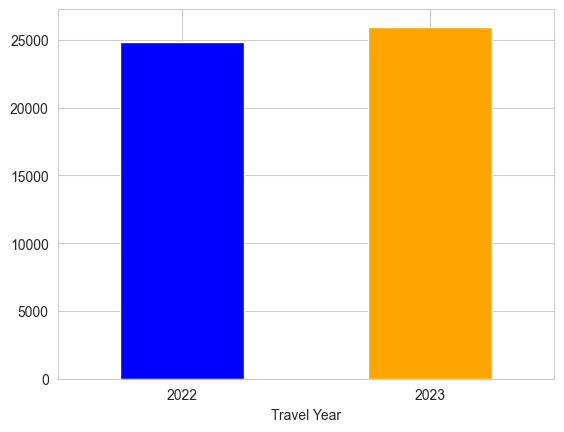

In [51]:
import matplotlib.pyplot as plt
transakcje_2022_2023.plot(kind = 'bar', color= ['blue','orange'])
plt.xticks(rotation=0)

Na podstawie powyższego wykresu stwierdzić można, że w 2023 klienci dokonali więcej transakcji zakupu biletu do Amsterdamu
Sprawdźmy teraz czy większa ilość transakcji wpływa na ilość podróżujących osób w danym roku 

In [52]:
pax_per_year = df.groupby('Travel Year')['Pax'].sum().sort_index()
pax_per_year

Travel Year
2022    94800
2023    98565
Name: Pax, dtype: int64

(array([0, 1]), [Text(0, 0, '2022'), Text(1, 0, '2023')])

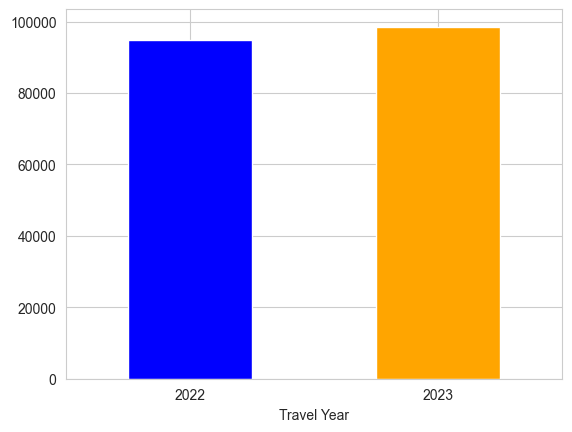

In [53]:
pax_per_year.plot(kind = 'bar', color=['blue','orange'])
plt.xticks(rotation=0)

Faktycznie, większa ilość odbytych transakcji w 2023 roku miała przełożenie na większą ilość podróżujących pasażerów co mówi o zwiększonym popycie na bilety do Amsterdamu w 2023 roku

Teraz porównajmy średnią cenę biletu w latach 2022 i 2023 przypadającą na jedną osobę


In [59]:
df['FARE+YQ Per Pax'] = df['FARE+YQ'] / df['Pax']
avg_ticket_price_per_pax = df.groupby('Travel Year')['FARE+YQ Per Pax'].mean().sort_index()

avg_ticket_price_per_pax

Travel Year
2022    161.612955
2023    157.192910
Name: FARE+YQ Per Pax, dtype: float64

Z powyższej tabeli dowiadujemy się, że średnia cena biletu przypadająca na jedną osobę w 2023 była nieznacznie niższa niż (o ok. 4 zł) w porównaniu do roku 2022
co być może przyczyniło się do większej liczby pasażerów odbywających podróż w 2023 roku 

Sprawdźmy teraz, czy większa liczba pasażerów ale niższa średnia cena biletu w 2023 roku przyczyniła się do większych zarobków linii lotniczych niż w 2022 roku

In [71]:
earnings = df.groupby('Travel Year')['FARE+YQ'].sum().sort_index()
earnings

Travel Year
2022    1.369235e+07
2023    1.380590e+07
Name: FARE+YQ, dtype: float64

(array([0, 1]), [Text(0, 0, '2022'), Text(1, 0, '2023')])

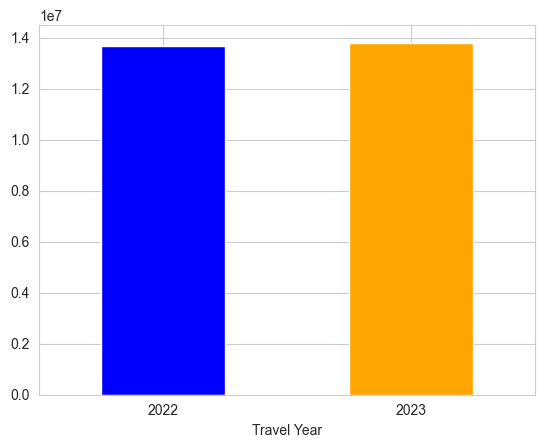

In [73]:
earnings.plot(kind='bar', color=['blue','orange'])
plt.xticks(rotation=0)

Z powyższego wykresu widzimy, że pomimo niższej średniej ceny biletu w 2023 roku linie lotnicze (KL + LO) zarobiły więcej, być może przez większy popyt na bilety linie lotnicze zdecydowały się obniżyć ceny biletów. Teraz sprawdźmy która z linii lotniczych w latach 2022 i 2023 zarobiła więcej 

In [75]:
earnings_per_ticketing_Al = df.groupby(['Travel Year','Ticketing Al'])['FARE+YQ'].sum()

earnings_per_ticketing_Al

Travel Year  Ticketing Al
2022         KL              5.811419e+06
             LO              7.880930e+06
2023         KL              5.720542e+06
             LO              8.085358e+06
Name: FARE+YQ, dtype: float64

(array([0, 1, 2, 3]),
 [Text(0, 0, '(2022, KL)'),
  Text(1, 0, '(2022, LO)'),
  Text(2, 0, '(2023, KL)'),
  Text(3, 0, '(2023, LO)')])

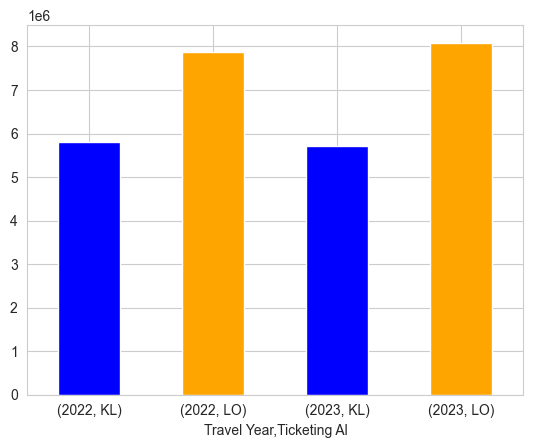

In [78]:
earnings_per_ticketing_Al.plot(kind='bar', color=['blue','orange'])
plt.xticks(rotation=0)

Z powyższego wykresu wynika, że w 2022 roku Linia lotnicza KL zarobiła więcej niż w 2023 roku - co jest dość zastanawiające, ponieważ w 2023 roku więcej osób podróżowało do Amsterdamu niż w roku 2022, natomiast linia LO w 2023 roku zarobiła więcej niż w 2022, linia LO zarobiła w latach 2022 oraz 2023 więcej niż linia KL - sprawdzmy teraz co miało wpływ na niższe zarobki linii KL w roku 2023 niż w roku 2022 i wyższe zarobki linii LO w 2023 niż w roku 2022 

Analizę rozpoczniemy od ilości osób podróżujących linią KL i LO w latach 2022 i 2023

In [85]:
pax_per_Al = df.groupby(['Travel Year', 'Ticketing Al'])['Pax'].sum().sort_index()
pax_per_Al

Travel Year  Ticketing Al
2022         KL              35116
             LO              59684
2023         KL              36256
             LO              62309
Name: Pax, dtype: int64

(array([0, 1, 2, 3]),
 [Text(0, 0, '(2022, KL)'),
  Text(1, 0, '(2022, LO)'),
  Text(2, 0, '(2023, KL)'),
  Text(3, 0, '(2023, LO)')])

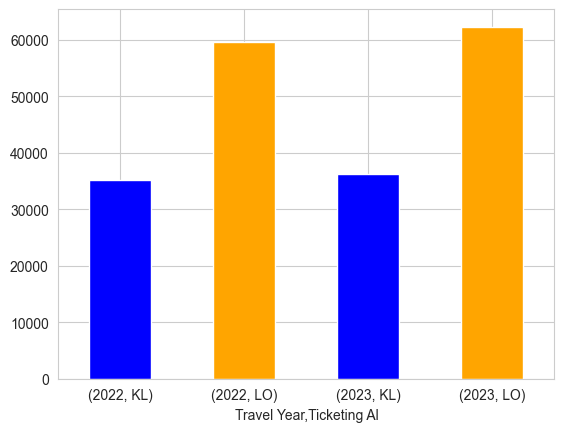

In [86]:
pax_per_Al.plot(kind='bar', color=['blue','orange'])
plt.xticks(rotation=0)

Analizując powyższy wykres widzimy dziwną anomalię w 2023 roku linią lotniczą KL podróżowało więcej osób niż w 2022 ale zarobili oni mniej w 2023 roku, Linia LO zgodnie z oczekiwaniami w 2023 roku zarobiła więcej - sprawdźmy teraz co mogło mieć wpływ na anomalię dotyczącą niższych zarobków linii KL w 2023 roku oraz sprawdzimy co miało wpływ na częstszy wybór przez pasażerów linii LO - w tym celu pokażemy średnie zestawienie ceny jednego biletu w latach 2022 oraz 2023 dla Linii KL oraz LO 

In [87]:
ticket_price_for_Al = df.groupby(['Travel Year','Ticketing Al'])['FARE+YQ Per Pax'].mean().sort_index()
ticket_price_for_Al

Travel Year  Ticketing Al
2022         KL              192.662954
             LO              132.096950
2023         KL              185.135395
             LO              130.650068
Name: FARE+YQ Per Pax, dtype: float64

(array([0, 1, 2, 3]),
 [Text(0, 0, '(2022, KL)'),
  Text(1, 0, '(2022, LO)'),
  Text(2, 0, '(2023, KL)'),
  Text(3, 0, '(2023, LO)')])

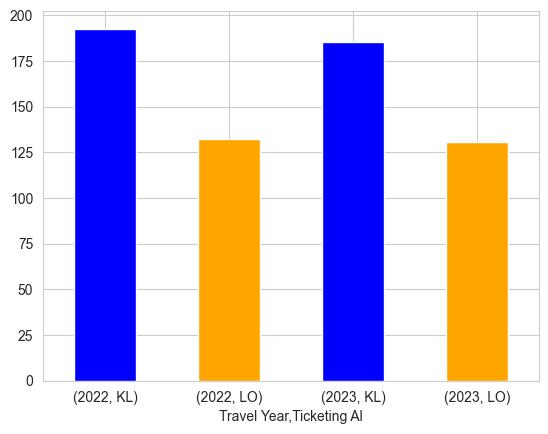

In [88]:
ticket_price_for_Al.plot(kind='bar', color=['blue','orange'])
plt.xticks(rotation=0)

Teraz wszystko staje się jasne, mniejszy popyt na bilety linii KL najprawdopodobniej wynikały z wyższej średniej kwoty którą było trzeba zapłacić za jeden bilet, Linia LO natomiast obniżyła średnią cenę biletu w 2023 roku dzięki czemu naprawdopodobniej zyskali na popycie pasażerów. Wyniki są dość zaskakujące, ponieważ z danych zamieszczonych na stronie: https://pl.wikipedia.org/wiki/KLM wynika że Linia KL (170 samolotów) ma o ponad 50% samolotów więcej niż wynosi flota lini LO wynosząca 74 samoloty (informację ze strony: https://www.lot.com/pl/pl/odkrywaj/o-lot/lot-w-liczbach).

Większy popyt na loty liniami LO wynika prawdopodobnie z tego, że jest to najpopularniejsza linia lotnicza w Polsce dzięki czemu na terenie Polski to właśnie ta linia jest najczęściej wybierana. 

Sprawdźmy teraz ile średnio wcześniej pasażerowie Linii KL i LO kupowali bilet przed podróżą w latach 2022 i 2023 w celu zauważenia pewnych trendów dotyczących wycieczek do Amstedramu 

In [89]:
mean_days_sold_prior_to_travel = df.groupby(['Travel Year','Ticketing Al'])['Days Sold Prior to Travel'].mean().sort_index()
mean_days_sold_prior_to_travel

Travel Year  Ticketing Al
2022         KL              34.649315
             LO              44.538661
2023         KL              34.416001
             LO              42.512767
Name: Days Sold Prior to Travel, dtype: float64

Z powyższej tabeli wynika, że średnie czasy zakupu biletów przed podróżą dla Linii KL w latach 2022 i 2023 są bardzo zbliżone natomiast dla linii lotniczych LO różnią się o ok. 2 dni (w 2022 pasażerowie średnio kupowali bilety 44 dni przed podróżą gdzie w 2023 były to już 42 dni)
Sprawdźmy czy nasze dane nie są zaburzone przez wartości odstające 

<Axes: xlabel='Travel Year', ylabel='Days Sold Prior to Travel'>

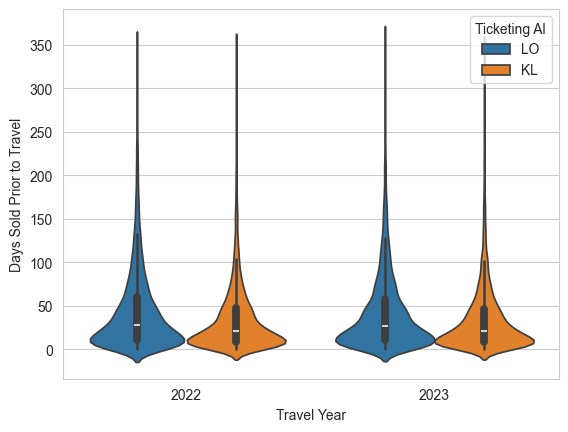

In [91]:
import seaborn as sns
sns.violinplot(x="Travel Year", y="Days Sold Prior to Travel",hue="Ticketing Al", data=df)


Sprawdzenie wartości odstających w kontekście ilości dni zakupowanych biletów przed podróżą było świetnym pomysłem, z powyższego wykresu widzimy że dla linii LO i KL w latach 2022 i 2023 wartości odstające, czyli bilety zakupione z bardzo dużym wyprzedzeniem, są widoczne w obu latach dla obu linii co psuje nam pogląd na średnią ilości dni zakupowanych biletów przed podróżą

W celu dokładniejszej analizy podzielimy klientów obu linii na trzy grupy:
    Grupa nr1: Klienci planujący podróż ze względu na zaplanowane daty urlopów lub daty umówionych spotań w Amsterdamie 
    Grupa nr2: Klienci kupujący bilety z wyprzedzeniem średnioterminowym
    Grupa nr3: Klienci kupujący bilety na Last Minute 

Grupę pierwszą cechują klienci którzy zakupili swoje bilety najpóźniej 4 miesiące włącznie przed podróżą 
Grupę drugą reprezentują klienci który zakupili bilet najwcześniej miesiąć a najpoźniej 4 miesiące przed podróżą 
Grupę trzecią reprezentują klienci którzy zakupili bilet na mniej niż miesiąc przed podróżą

In [93]:
def classify_customer(days_prior):
    if days_prior > 120:
        return 'Grupa nr 1'
    elif 30 < days_prior <= 120:
        return 'Grupa nr 2'
    else:
        return 'Grupa nr 3'
    
df['Customer Group'] = df['Days Sold Prior to Travel'].apply(classify_customer)


Teraz sprawdźmy ilu klientów w latach 2022 i 2023 należało do danej grupy - pomoże nam to zbadać trend dotyczący celu podróży do Amsterdamu 

In [94]:
group_count = df.groupby(['Travel Year', 'Customer Group'])['Pax'].sum()
group_count

Travel Year  Customer Group
2022         Grupa nr 1         3816
             Grupa nr 2        25103
             Grupa nr 3        65881
2023         Grupa nr 1         3523
             Grupa nr 2        26021
             Grupa nr 3        69021
Name: Pax, dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '(2022, Grupa nr 1)'),
  Text(1, 0, '(2022, Grupa nr 2)'),
  Text(2, 0, '(2022, Grupa nr 3)'),
  Text(3, 0, '(2023, Grupa nr 1)'),
  Text(4, 0, '(2023, Grupa nr 2)'),
  Text(5, 0, '(2023, Grupa nr 3)')])

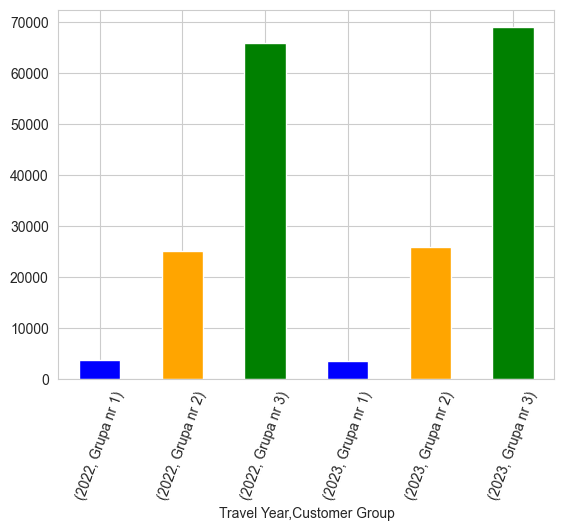

In [100]:
group_count.plot(kind='bar', color = ['blue','orange','green'])
plt.xticks(rotation=70)

Na podstawie powyższego wykresu widzimy że zarówno w 2022 jak i w 2023 roku najwięcej klientów należało do grupy trzeciej która reprezentuje klientów decydujących się na zakup biletu Last Minute - mówi to o tym że wiele osób wybiera Amsterdam jako cel spontanicznych podróży, często podejmując decyzję o wyjeździe na krótko przed planowaną datą podróży. Może to wskazywać na charakter Amsterdamu jako atrakcyjnej destynacji turystycznej, która przyciąga podróżnych szukających szybkiego wypadu na weekend. Najmniej osób decydowało się zakupić bilety najpóźniej 4 miesiące przed datą podróży, co sugeruje, że Amsterdam nie jest typowym celem podróży wymagającym długoterminowego planowania.

Spójrzmy teraz na średnią cenę biletu w poszczególnych grupach

In [108]:
price_by_group = df.groupby(['Travel Year', 'Customer Group'])['FARE+YQ Per Pax'].mean()
price_by_group

Travel Year  Customer Group
2022         Grupa nr 1        112.943975
             Grupa nr 2        138.729805
             Grupa nr 3        181.771860
2023         Grupa nr 1        110.915564
             Grupa nr 2        131.429563
             Grupa nr 3        178.045101
Name: FARE+YQ Per Pax, dtype: float64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '(2022, Grupa nr 1)'),
  Text(1, 0, '(2022, Grupa nr 2)'),
  Text(2, 0, '(2022, Grupa nr 3)'),
  Text(3, 0, '(2023, Grupa nr 1)'),
  Text(4, 0, '(2023, Grupa nr 2)'),
  Text(5, 0, '(2023, Grupa nr 3)')])

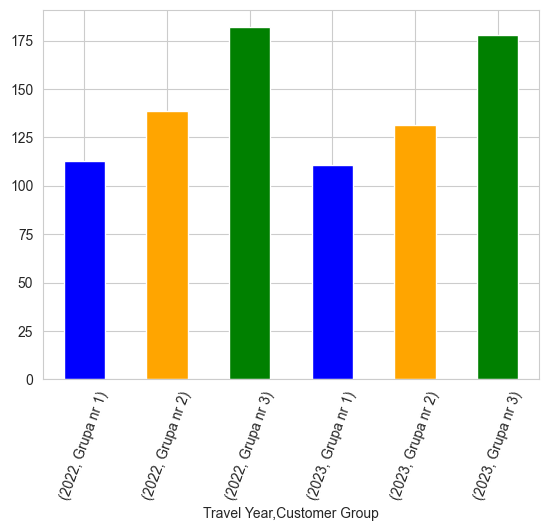

In [109]:
price_by_group.plot(kind = 'bar', color = ['blue','orange','green'])
plt.xticks(rotation=70)

Na podstawie powyższego wykresu, widzimy że najwyższe ceny zarówno w latach 2022 jak i 2023 odnotowano w grupie trzeciej która decyduje się na zakup biletu najpóźniej miesiąc przed wylotem - analizując dane z tego i wcześniejszego wykresu mówiącego o ilości osób w danej grupie osób możemy powiedzieć że wiele osób mimo wyższych cen wybiera zakup biletów Last Minute. Wskazuje to na istotny segment rynku podróży, gdzie elastyczność i możliwość szybkiej rezerwacji są ważniejsze niż koszt biletu. Ta grupa klientów jest gotowa zapłacić wyższą cenę za bilety, co może wynikać z chęci spontanicznych wyjazdów turystycznych lub innych nieprzewidzianych okoliczności. Wysokie ceny w tej grupie nie zniechęcają podróżnych, co sugeruje, że istnieje znaczący popyt na bilety dostępne na krótko przed wylotem, a linie lotnicze mogą z tego czerpać korzyści finansowe. Najniższe ceny biletów odnotowano dla grupy nr1 zarówno w roku 2022 jak i 2023 - natomiast pomimo najniższych cen biletów grupa ta rzadko decydowała się na zakup biletów o czym mówi nam wcześniejszy wykres. 

Teraz jeszcze dokładniej przeanalizujemy trend dotyczący celu podróży, na podstawie danych dotyczących ilości nocy spędzonych w Amsterdamie sklasyfikujemy klientów do następujących grup: 
    Grupa nr1: nie zakupujący biletu powrotnego 
    Grupa nr2: Klienci Przebywający w Amsterdamie w celach służbowych Podróże Służbowe (0-1 nocy)
    Grupa nr3: Klienci, którzy spędzają 2 do 7 nocy w Amsterdamie, prawdopodobnie planują bardziej intensywne zwiedzanie lub relaks.
    Grupa nr4: Klienci, którzy spędzają 8 do 14 nocy w Amsterdamie, są zazwyczaj turystami na dłuższych wakacjach lub podróżnikami, którzy chcą dokładnie poznać miasto i okolice.
    Grupa nr5: Klienci, którzy spędzają w Amsterdamie 15 lub więcej nocy

In [120]:
def classify_stay(nights):
    if pd.isnull(nights):
        return 'Grupa nr 1'
    elif nights <= 1:
        return 'Grupa nr 2'
    elif 1 < nights <= 7:
        return 'Grupa nr 3'
    elif 8 <= nights <= 14:
        return 'Grupa nr 4'
    else:
        return 'Grupa nr 5'
    
df['Stay Group'] = df['Nights Stayed'].apply(classify_stay)


In [121]:
count_per_nights_stayed = df.groupby(['Travel Year', 'Stay Group'])['Pax'].sum().sort_index()
count_per_nights_stayed

Travel Year  Stay Group
2022         Grupa nr 1    23514
             Grupa nr 2    13500
             Grupa nr 3    48995
             Grupa nr 4     4289
             Grupa nr 5     4502
2023         Grupa nr 1    26079
             Grupa nr 2    13791
             Grupa nr 3    50573
             Grupa nr 4     4139
             Grupa nr 5     3983
Name: Pax, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '(2022, Grupa nr 1)'),
  Text(1, 0, '(2022, Grupa nr 2)'),
  Text(2, 0, '(2022, Grupa nr 3)'),
  Text(3, 0, '(2022, Grupa nr 4)'),
  Text(4, 0, '(2022, Grupa nr 5)'),
  Text(5, 0, '(2023, Grupa nr 1)'),
  Text(6, 0, '(2023, Grupa nr 2)'),
  Text(7, 0, '(2023, Grupa nr 3)'),
  Text(8, 0, '(2023, Grupa nr 4)'),
  Text(9, 0, '(2023, Grupa nr 5)')])

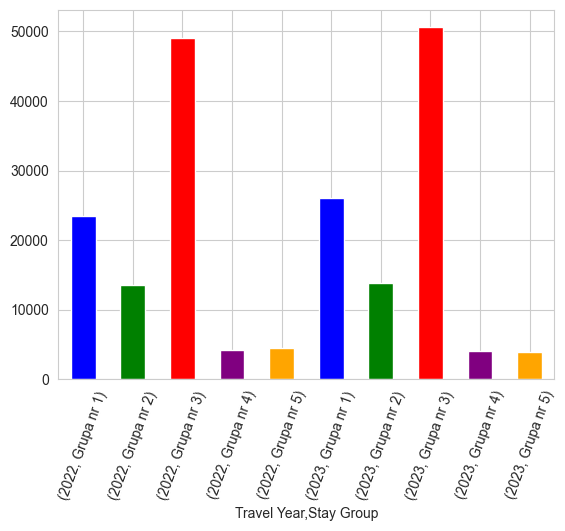

In [124]:
count_per_nights_stayed.plot(kind = 'bar', color = ['blue', 'green', 'red', 'purple', 'orange'])
plt.xticks(rotation = 70)

Na podstawie powyższego wykresu widzimy, że najwięcej podróżnych należy do grupy nr 3 (2-7 nocy) zarówno w 2022 jak i 2023 jednakże w 2023 więcej osób decydowało się na taką podróż ponownie wskazuje to na popularność Amsterdamu jako destynacji na krótki wyjazd. Analizując dane z tego wykresu mówiącego o liczbie osób w danej grupie, możemy powiedzieć, że grupa nr 2 (0-1 nocy) wykazuje niewielki, ale stabilny wzrost w porównaniu do roku 2022, co może oznaczać ciągłe zapotrzebowanie na krótkie podróże biznesowe. Znaczący wzrost w porównaniu do roku 2022 w grupie nr 1 (klienci którzy nie zakupują biletu powrotnego) sugeruje rosnącą tendencję do osób zmieniających miejsce zamieszkania. 

Grupy 4 (8-14 nocy) i 5 (15+ nocy) pozostają stosunkowo małe w zarówno 2022 jak i 2023 roku, z niewielkimi zmianami, co wskazuje na stabilność w preferencjach dotyczących dłuższych pobytów. Pomimo tego, że te grupy są mniej liczne, ich stabilność sugeruje że istnieje stała liczba podróżnych
którzy decydują się na dłuższe pobyty w Amsterdamie.

Powyższe zestawienia tabelaryczne oraz wykresy pozwalają lepiej zrozumieć preferencje i zachowania podróżnych wybierających Amsterdam jako cel podróży. 

Spójrzmy także na średni czas spędzany w amsterdamie w latach 2022 oraz 2023

In [126]:
mean_time = df.groupby('Travel Year')['Nights Stayed'].mean()
mean_time

Travel Year
2022    11.497212
2023    10.473458
Name: Nights Stayed, dtype: float64

Analizując powyższą tabelę okazuje się że w 2022 roku klienci zostawali średnią jedną noc dłużej w Amsterdamie niż w roku 2023

Kolejnym etapem analizy charakterystyki połączenia Warszawa - Amsterdam będzie zestawienie długości pobytu w zależności od liczby dni dzielących zakup biletu a wylot w latach 2022 oraz 2023 

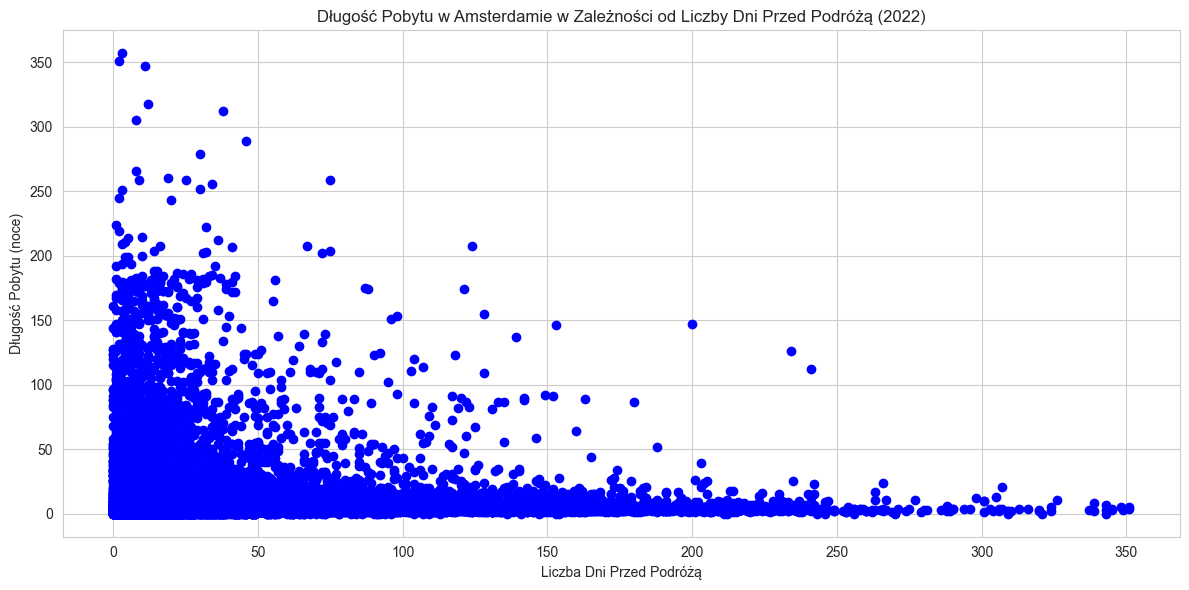

In [145]:
df_2022 = df[df['Travel Year'] == 2022]

plt.figure(figsize=(12, 6))
plt.scatter(df_2022['Days Sold Prior to Travel'], df_2022['Nights Stayed'], color='blue', marker='o')
plt.xlabel('Liczba Dni Przed Podróżą')
plt.ylabel('Długość Pobytu (noce)')
plt.title('Długość Pobytu w Amsterdamie w Zależności od Liczby Dni Przed Podróżą (2022)')
plt.tight_layout()
plt.show()

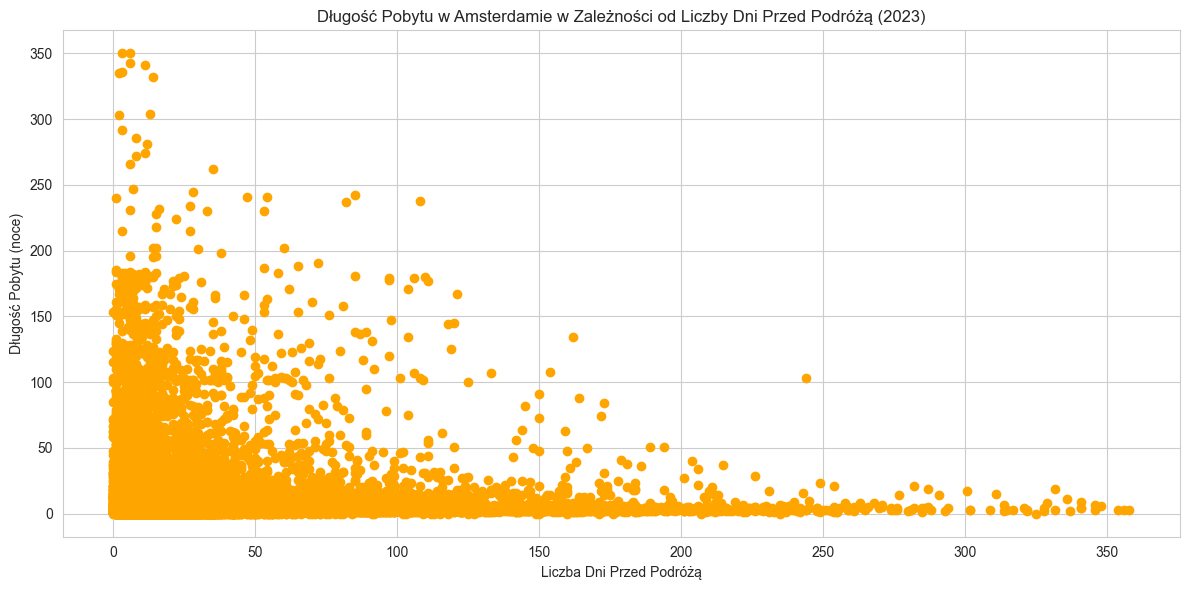

In [144]:
df_2023 = df[df['Travel Year'] == 2023]

plt.figure(figsize=(12, 6))
plt.scatter(df_2023['Days Sold Prior to Travel'], df_2023['Nights Stayed'], color='orange', marker='o')
plt.xlabel('Liczba Dni Przed Podróżą')
plt.ylabel('Długość Pobytu (noce)')
plt.title('Długość Pobytu w Amsterdamie w Zależności od Liczby Dni Przed Podróżą (2023)')
plt.tight_layout()
plt.show()

Analizując oba wykresy dochodzimy do wniosku że istnieje silna relacja między liczbą dni przed podróżą, w której bilet został zakupiony a długością pobytu w Amsterdamie. Osoby, które rezerwują bilety z dużym wyprzedzeniem, najczęściej planują krótsze pobyty, podczas gdy rezerwacje Last Minute są bardziej zróżnicowane pod względem długości pobytu. Jednak ogólnie rzecz biorąc, krótsze pobyty dominują niezależnie od terminu zakupu biletu. To może wskazywać, że Amsterdam jest popularnym celem krótkich wyjazdów, zarówno turystycznych, jak i biznesowych, a podróżni preferują elastyczność w planowaniu swoich podróży.

Teraz przejdziemy do analizy podróży do Amsterdamu w różnych kwartałach roku co da nam wgląd w trendy zakupowe klientów

In [152]:
df['Quarter'] = df['Travel Month'].dt.to_period('Q')

transakcje_na_kwartal = df.groupby(['Travel Year','Quarter'])['Pax'].sum().sort_index()

transakcje_na_kwartal

Travel Year  Quarter
2022         2022Q1     20513
             2022Q2     26505
             2022Q3     24137
             2022Q4     23645
2023         2023Q1     21970
             2023Q2     28536
             2023Q3     24783
             2023Q4     23276
Name: Pax, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '(2022, 2022Q1)'),
  Text(1, 0, '(2022, 2022Q2)'),
  Text(2, 0, '(2022, 2022Q3)'),
  Text(3, 0, '(2022, 2022Q4)'),
  Text(4, 0, '(2023, 2023Q1)'),
  Text(5, 0, '(2023, 2023Q2)'),
  Text(6, 0, '(2023, 2023Q3)'),
  Text(7, 0, '(2023, 2023Q4)')])

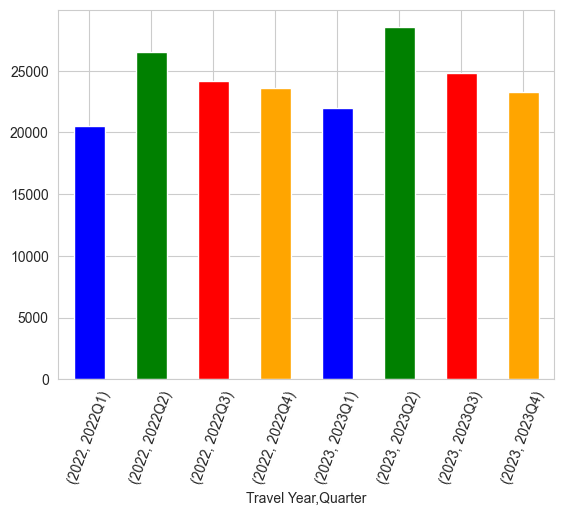

In [153]:
transakcje_na_kwartal.plot(kind = 'bar', color = ['blue', 'green', 'red', 'orange'])
plt.xticks(rotation = 70)

Sezon wakacyjny (Q2 i Q3): Największa liczba podróżnych wybiera Amsterdam w drugim i trzecim kwartale roku, co sugeruje, że miasto jest bardzo popularnym celem wakacyjnym. Wzrost liczby pasażerów w tych kwartałach w 2023 roku w porównaniu do 2022 roku wskazuje na rosnącą popularność Amsterdamu jako miejsca na wakacyjne wyjazdy.

Sezon zimowy (Q4 i Q1): Mniejsza liczba podróżnych w pierwszym i czwartym kwartale roku może wskazywać na sezonowe spadki zainteresowania, choć widać pewne zwiększenie podróży w czwartym kwartale, prawdopodobnie związane z okresem świątecznym. Porównanie z latami 2022 i 2023 pokazuje, że liczba pasażerów w pierwszym kwartale 2023 roku wzrosła co może sugerować większe zainteresowanie podróżami zimowymi natomiast liczba pasażerów w czwartym kwartale 2023 roku nieznacznie spadła w porównaniu do czwartego kwartału 2022 roku.

Teraz przeanalizujemy średni koszt biletu w danym kwartale danego roku

In [156]:
cena_kwartal = df.groupby(['Travel Year','Quarter'])['FARE+YQ Per Pax'].mean().sort_index()

cena_kwartal

Travel Year  Quarter
2022         2022Q1     166.248235
             2022Q2     171.685674
             2022Q3     149.711551
             2022Q4     158.656593
2023         2023Q1     144.764958
             2023Q2     158.860377
             2023Q3     156.897410
             2023Q4     166.402487
Name: FARE+YQ Per Pax, dtype: float64

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '(2022, 2022Q1)'),
  Text(1, 0, '(2022, 2022Q2)'),
  Text(2, 0, '(2022, 2022Q3)'),
  Text(3, 0, '(2022, 2022Q4)'),
  Text(4, 0, '(2023, 2023Q1)'),
  Text(5, 0, '(2023, 2023Q2)'),
  Text(6, 0, '(2023, 2023Q3)'),
  Text(7, 0, '(2023, 2023Q4)')])

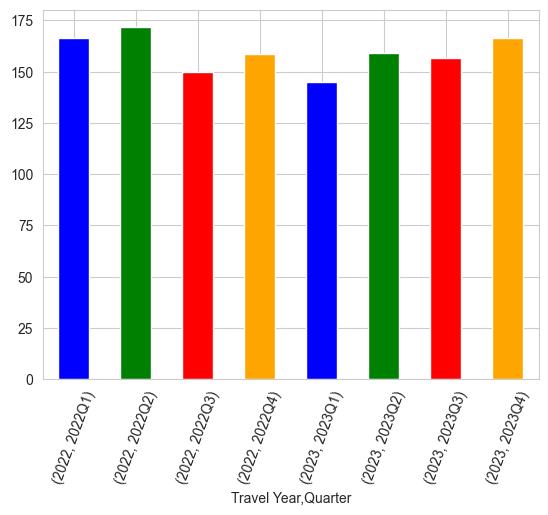

In [160]:
cena_kwartal.plot(kind = 'bar', color = ['blue', 'green', 'red', 'orange'])
plt.xticks(rotation = 70)

W obu latach widać wyraźne sezonowe wahania cen biletów. Najwyższe średnie ceny biletów w 2022 roku odnotowano w drugim kwartale (Q2), natomiast najniższe w trzecim kwartale (Q3). W 2023 roku najniższe ceny biletów były w pierwszym kwartale (Q1), a najwyższe w czwartym kwartale (Q4). Ogólnie rzecz biorąc, średni koszt biletu w pierwszej połowie 2023 roku był niższy niż w analogicznym okresie 2022 roku, co może wskazywać na obniżki cen biletów w celu przyciągnięcia większej liczby pasażerów natomiast w drugiej połowie roku ceny te były wyższe co sugeruje rosnący popyt na podróże do Amsterdamu oraz możliwość zwiększenia cen w odpowiedzi na zwiększone zapotrzebowanie w sezonie wakacyjnym i okresie świątecznym. W obu latach widać, że ceny biletów różnią się w zależności od kwartału co może wynikać z różnych strategii cenowych linii lotniczych dostosowanych do sezonowości i popytu.

Na koniec przejdziemy do analizy ilości zakupowanych biletów podczas jednej transakcji w danym roku
Transakcje podzielimy na odpowiednie grupy:
    Grupa nr1: Klienci zakupujący jeden bilet 
    Grupa nr2: Klienci zakupujący 2 bilety 
    Grupa nr3: Klienci zakupujący od 3 do 10 biletów
    Grupa nr4: Klienci zakupujący powyżej 10 biletów

In [174]:
def classify_transaction(pax):
    if pax == 1:
        return '1'
    elif pax == 2:
        return '2'
    elif 3 <= pax <= 10:
        return '3'
    elif pax > 10:
        return '4'

df['Transaction Group'] = df['Pax'].apply(classify_transaction)

In [176]:
tickets_count_by_group = df.groupby(['Travel Year','Transaction Group'])['Transaction Group'].count().sort_index()
tickets_count_by_group

Travel Year  Transaction Group
2022         1                    11498
             2                     5290
             3                     6172
             4                     1914
2023         1                    12021
             2                     5523
             3                     6411
             4                     2010
Name: Transaction Group, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '(2022, 1)'),
  Text(1, 0, '(2022, 2)'),
  Text(2, 0, '(2022, 3)'),
  Text(3, 0, '(2022, 4)'),
  Text(4, 0, '(2023, 1)'),
  Text(5, 0, '(2023, 2)'),
  Text(6, 0, '(2023, 3)'),
  Text(7, 0, '(2023, 4)')])

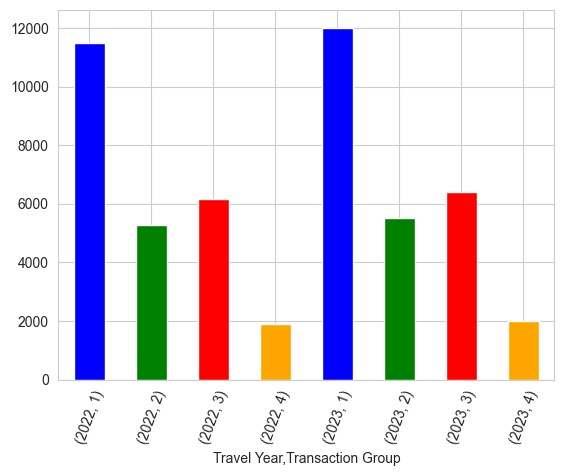

In [177]:
tickets_count_by_group.plot(kind = 'bar', color = ['blue', 'green', 'red', 'orange'])
plt.xticks(rotation = 70)

Najwięcej transakcji dotyczy zakupu pojedynczych biletów zarówno w 2022 jak i 2023 roku z większa tendencją na 2023 rok, co może sugerować, że wiele osób podróżuje samotnie, prawdopodobnie w celach służbowych lub emigracyjnych. Druga najpopularniejsza grupa zarówno w roku 2022 jak i 2023 to transakcje obejmujące 3-10 biletów, co może sugerować popularność Amsterdamu jako kierunku powszechnego u większych grup znajomych lub rodzin. Bilety dla par ku zdziwieniu znalazły się dopiero na trzecim miejscu w naszym zestawieniu co sugeruje, że Amsterdam nie jest popularny wśród par. Zakup powyżej 10 biletów ktory najprawdopodobniej obejmuje różnego rodzaju wycieczki turystyczne jest najmniej popularny, ale odnotowano niewielki wzrost w liczbie takich transakcji w 2023 roku w porównaniu do 2022 roku.

Wnioski końcowe
1. Ocena kondycji połączenia Warszawa - Amsterdam:
Na podstawie danych i można stwierdzić, że kondycja połączenia Warszawa - Amsterdam w 2023 roku była zdecydowanie lepsza niż w 2022 roku. W 2023 roku odnotowano więcej transakcji zakupu biletów oraz większą liczbę pasażerów, co wskazuje na rosnący popyt na loty do Amsterdamu.
W 2023 roku klienci dokonali więcej transakcji zakupu biletu do Amsterdamu w porównaniu do 2022 roku. Większa liczba transakcji przełożyła się na większą liczbę podróżujących pasażerów. Średnia cena biletu przypadająca na jedną osobę była nieznacznie niższa w 2023 roku (157.19 PLN) w porównaniu do 2022 roku (161.61 PLN), co mogło przyczynić się do zwiększenia liczby pasażerów. Pomimo niższej średniej ceny biletu w 2023 roku, linie lotnicze (KL + LO) zarobiły więcej, co sugeruje, że obniżki cen przyczyniły się do większego popytu na bilety. W obu latach średni czas zakupu biletu przed podróżą był nieznacznie dłuższy dla pasażerów linii LO. Najwięcej podróżnych należało do grupy którzy spędziali w Amsterdaime od 2 do 7 nocy co wskazuje na popularność Amsterdamu jako destynacji na krótki wyjazd. Znaczący wzrost w grupie klientów którzy nie zakupują biletu powrotnego sugeruje rosnącą tendencję do osób zmieniających miejsce zamieszkania. Największa liczba podróżnych wybiera Amsterdam w sezonie wakacyjnym (Q2 i Q3), co sugeruje, że miasto jest bardzo popularnym celem wakacyjnym. Mniejsza liczba podróżnych w sezonie zimowym (Q4 i Q1) może wskazywać na sezonowe spadki zainteresowania, choć widać pewne zwiększenie podróży w czwartym kwartale, prawdopodobnie związane z okresem świątecznym.

2. Charakterystyka ruchu na połączeniu Warszawa - Amsterdam:
- Ruch na tym połączeniu charakteryzuje się dużą liczbą podróży krótkoterminowych, zarówno turystycznych, jak i biznesowych.
- Amsterdam jest popularnym celem krótkich wyjazdów, często podejmowanych na krótko przed planowaną datą podróży.
- Wysokie ceny biletów w grupie Last Minute wskazują na znaczący popyt na bilety dostępne na krótko przed wylotem.
- Amsterdam jest popularny wśród młodych ludzi, którzy wybierają się tam na krótkie spontaniczne wyjazdy.
- Miasto przyciąga także osoby podróżujące służbowo, co jest widoczne w stabilnym popycie na krótkie pobyty (0-1 nocy).
- Podróże do Amsterdamu są również popularne wśród rodzin i grup znajomych, co widać w liczbie zakupionych biletów na większe grupy (3-10 biletów).
- Amsterdam jest celem podróży dla osób zmieniających miejsce zamieszkania, co może być powiązane z dużą liczbą osób, które nie kupują biletu powrotnego.

3. Wpływ COVID-19 na obciążenie linii lotniczych w 2022 roku:
W 2022 roku obciążenie linii lotniczych było mniejsze najprawdopodobniej przez restrykcje związane z COVID-19, które nadal obowiązywały. W Amsterdamie restrykcje dotyczyły m.in. obowiązku noszenia maseczek, ograniczeń w podróżowaniu oraz wymogów dotyczących testów i kwarantanny dla podróżnych.

Podsumowując, analiza danych wskazuje na rosnącą popularność połączenia Warszawa - Amsterdam w 2023 roku, z większą liczbą transakcji i pasażerów, pomimo nieznacznie niższych cen biletów. Sezonowość oraz charakterystyka ruchu wskazują na dominację krótkoterminowych podróży turystycznych i biznesowych, a wpływ COVID-19 w 2022 roku miał znaczący wpływ na obciążenie linii lotniczych.



